# Data Science Salaries

## Introduction
In recent years, the field of data science has experience exponential growth, with organizations across various industries recognizing the value of data-driven insights. As demand for data scientists continues to rise, understanding the factors that influence job salaries becomes crucial for both employers and job seekers. This project aims to analyze data science job salaries in the United States from 2020 to 2023, exploring trends and patterns in compensation and developing a machine learning model to predict salaries based on multiple factors. 

### Stages
1. Data Preprocessing
2. Exploratory Data Analysis
3. Statistical Analysis
3. Feature Engineering
4. Model Development
5. Model Evaluation
6. Conclusion

## Data Preprocessing

In [1]:
# import libraries
import pandas as pd
import numpy as np

In [2]:
# load data
df = pd.read_csv('v7_Latest_Data_Science_Salaries.csv')

In [3]:
# general info on data
df.info()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5736 entries, 0 to 5735
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           5736 non-null   object
 1   Employment Type     5736 non-null   object
 2   Experience Level    5736 non-null   object
 3   Expertise Level     5736 non-null   object
 4   Salary              5736 non-null   int64 
 5   Salary Currency     5736 non-null   object
 6   Company Location    5736 non-null   object
 7   Salary in USD       5736 non-null   int64 
 8   Employee Residence  5736 non-null   object
 9   Company Size        5736 non-null   object
 10  Year                5736 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 493.1+ KB


,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
4053,Data Engineer,Full-Time,Entry,Junior,90000,United States Dollar,United States,90000,United States,Medium,2023
86,Research Analyst,Full-Time,Senior,Expert,200000,United States Dollar,United States,200000,United States,Medium,2024
2585,Data Engineer,Full-Time,Mid,Intermediate,90000,British Pound Sterling,United Kingdom,110736,United Kingdom,Medium,2023
1670,Machine Learning Engineer,Full-Time,Senior,Expert,205600,United States Dollar,United States,205600,United States,Medium,2023
3768,Data Engineer,Full-Time,Mid,Intermediate,186600,United States Dollar,United States,186600,United States,Medium,2023
836,Data Analyst,Full-Time,Entry,Junior,44000,British Pound Sterling,United Kingdom,54137,United Kingdom,Medium,2023
4588,Research Engineer,Full-Time,Senior,Expert,249500,United States Dollar,United States,249500,United States,Medium,2022
3059,ML Engineer,Full-Time,Senior,Expert,290000,United States Dollar,United States,290000,United States,Medium,2023
2391,Data Engineer,Full-Time,Senior,Expert,129000,United States Dollar,United States,129000,United States,Medium,2023
3872,Data Engineer,Full-Time,Senior,Expert,179170,United States Dollar,United States,179170,United States,Medium,2023


In [4]:
# fix columns naming conventions
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')

In [5]:
# change all string values to lowercase
columns_str = ['job_title','employment_type','experience_level','expertise_level','salary_currency','company_location','employee_residence','company_size']
for element in columns_str:
    df[element] = df[element].apply(lambda x: x.lower())

In [6]:
# check changes
df.info()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5736 entries, 0 to 5735
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           5736 non-null   object
 1   employment_type     5736 non-null   object
 2   experience_level    5736 non-null   object
 3   expertise_level     5736 non-null   object
 4   salary              5736 non-null   int64 
 5   salary_currency     5736 non-null   object
 6   company_location    5736 non-null   object
 7   salary_in_usd       5736 non-null   int64 
 8   employee_residence  5736 non-null   object
 9   company_size        5736 non-null   object
 10  year                5736 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 493.1+ KB


,job_title,employment_type,experience_level,expertise_level,salary,salary_currency,company_location,salary_in_usd,employee_residence,company_size,year
2810,data analyst,full-time,senior,expert,192000,united states dollar,canada,192000,canada,medium,2023
1222,data scientist,full-time,senior,expert,190200,united states dollar,united states,190200,united states,medium,2023
2373,research scientist,full-time,senior,expert,120000,united states dollar,united states,120000,united states,medium,2023
639,data scientist,full-time,senior,expert,93300,united states dollar,united states,93300,united states,medium,2023
1538,analytics engineer,full-time,senior,expert,178250,united states dollar,united states,178250,united states,medium,2023
4416,data analyst,full-time,mid,intermediate,116000,united states dollar,united states,116000,united states,medium,2023
2052,research engineer,full-time,senior,expert,196000,united states dollar,united states,196000,united states,medium,2023
3263,research scientist,full-time,senior,expert,250000,united states dollar,united states,250000,united states,medium,2023
4288,data science manager,full-time,senior,expert,231250,united states dollar,united states,231250,united states,medium,2023
1936,analytics engineer,full-time,mid,intermediate,172200,united states dollar,united states,172200,united states,medium,2023


In [7]:
# check for duplicates in df
df.duplicated().sum()

0

In [8]:
# remove salaries for companies not located in US
df = df[df.company_location=='united states']

In [9]:
# double check unique values in columns
print(df.company_location.unique())
print(df.salary_currency.unique())
print(df.employee_residence.unique())

['united states']
['united states dollar' 'british pound sterling' 'euro' 'indian rupee'
 'hungarian forint']
['united states' 'uganda' 'italy' 'thailand' 'canada' 'philippines'
 'germany' 'tunisia' 'belgium' 'turkey' 'nigeria' 'ghana' 'india' 'egypt'
 'uzbekistan' 'argentina' 'france' 'portugal' 'kuwait' 'spain' 'china'
 'costa rica' 'chile' 'bolivia, plurinational state of' 'malaysia'
 'brazil' 'russian federation' 'viet nam' 'greece' 'bulgaria' 'hungary'
 'puerto rico' 'romania']


In [10]:
# remove unnecessary columns
df = df.drop(['company_location','salary','salary_currency','employee_residence'],axis=1)

In [11]:
# check changes
df.info()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
Index: 4564 entries, 0 to 5734
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   job_title         4564 non-null   object
 1   employment_type   4564 non-null   object
 2   experience_level  4564 non-null   object
 3   expertise_level   4564 non-null   object
 4   salary_in_usd     4564 non-null   int64 
 5   company_size      4564 non-null   object
 6   year              4564 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 285.2+ KB


,job_title,employment_type,experience_level,expertise_level,salary_in_usd,company_size,year
1570,data engineer,full-time,senior,expert,81500,medium,2023
600,data scientist,full-time,mid,intermediate,108000,medium,2023
804,data science,full-time,senior,expert,245000,medium,2023
4631,data analyst,full-time,senior,expert,110600,medium,2022
87,research analyst,full-time,senior,expert,150000,medium,2024
332,data engineer,full-time,senior,expert,162540,medium,2023
4336,applied scientist,full-time,senior,expert,180000,medium,2023
2001,research scientist,full-time,senior,expert,163200,medium,2023
1485,data architect,full-time,senior,expert,191600,medium,2023
718,business intelligence analyst,full-time,entry,junior,132567,medium,2023


## Exploratory Data Exploration

In [29]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

array([[<Axes: title={'center': 'salary_in_usd'}>,
        <Axes: title={'center': 'year'}>]], dtype=object)

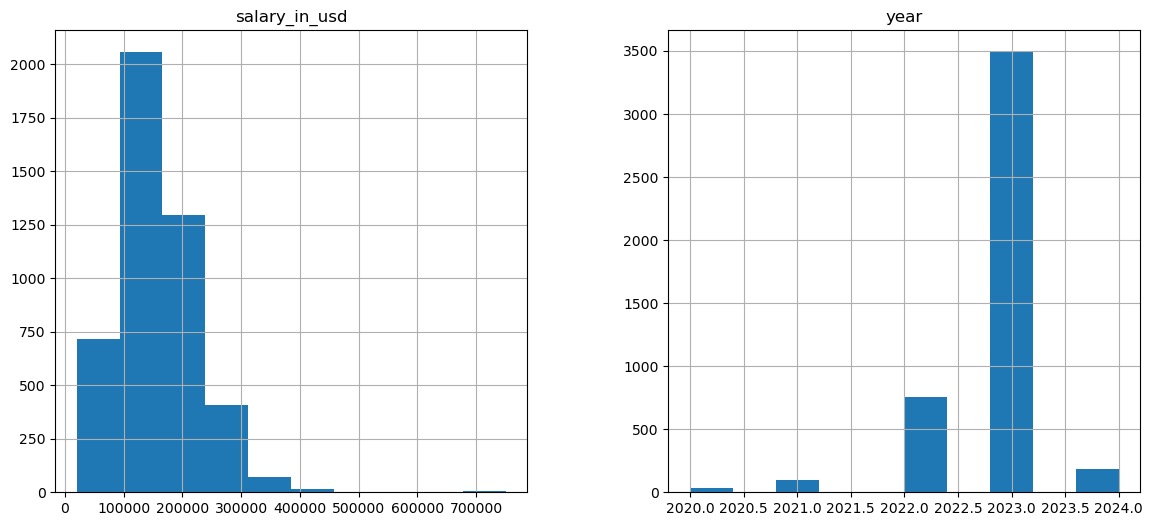

In [19]:
# distribution of numeric columns
df.hist(figsize=(14,6))


<Axes: xlabel='employment_type', ylabel='count'>

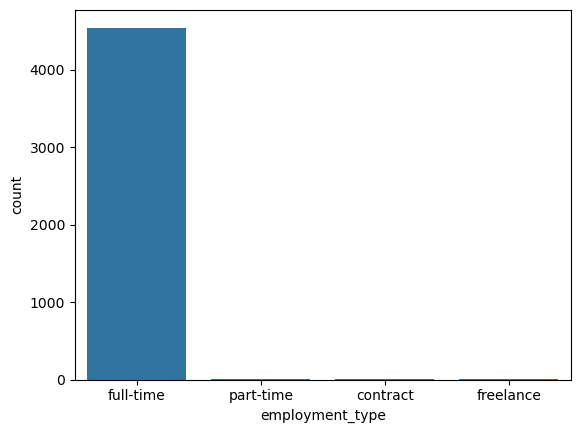

In [20]:
# countplot of employment type
sns.countplot(df,x='employment_type')

<Axes: xlabel='experience_level', ylabel='count'>

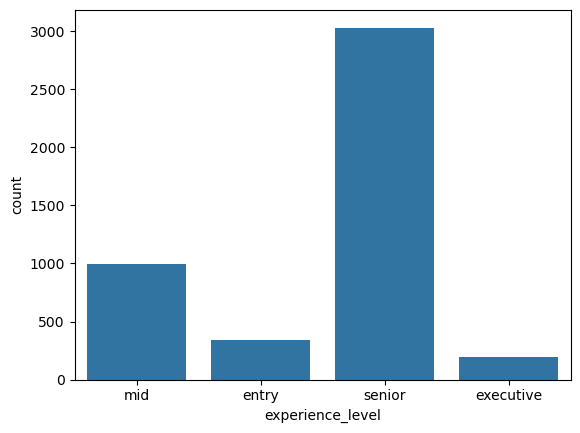

In [24]:
# countplot of experience level
sns.countplot(df,x='experience_level')

<Axes: xlabel='expertise_level', ylabel='count'>

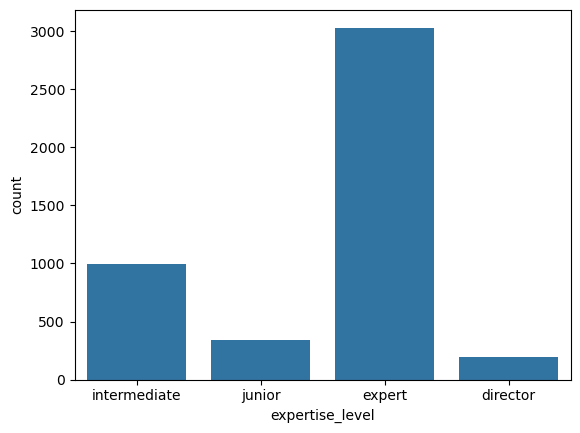

In [26]:
# countplot of expertise level
sns.countplot(df,x='expertise_level')

<Axes: xlabel='company_size', ylabel='count'>

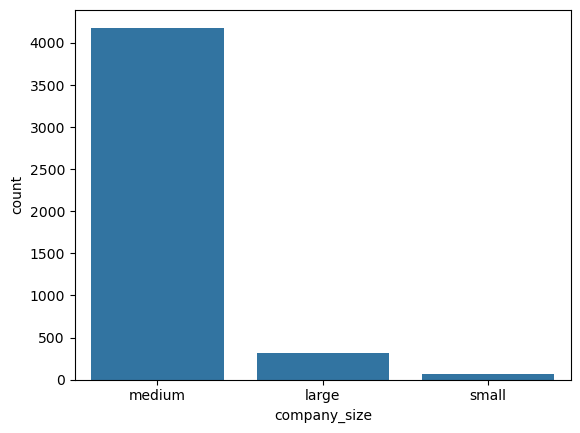

In [27]:
# countplot of company size
sns.countplot(df,x='company_size')

In [31]:
# distribution of salaries based on employment type
hist1 = px.histogram(df,x='salary_in_usd',color='employment_type')